import numpy as np
import time



def matrix_mult (x, y):
    x1 = np.arange(x).reshape(10,10)
    y1 = np.arange(y).reshape(10,10)
    M = np.ones((10,10))
    
    for i in range (len(x1)):
        for j in range (len(y1)):
            M[i][j] = sum([a*b for a in x1[i,:] for b in y1[:,j]])
            
    return M


x1 = np.arange(100).reshape(10,10)
y1 = np.arange(100).reshape(10,10)

print(matrix_mult(100,100))

print(x1.dot(y1))

<Figure size 432x288 with 0 Axes>

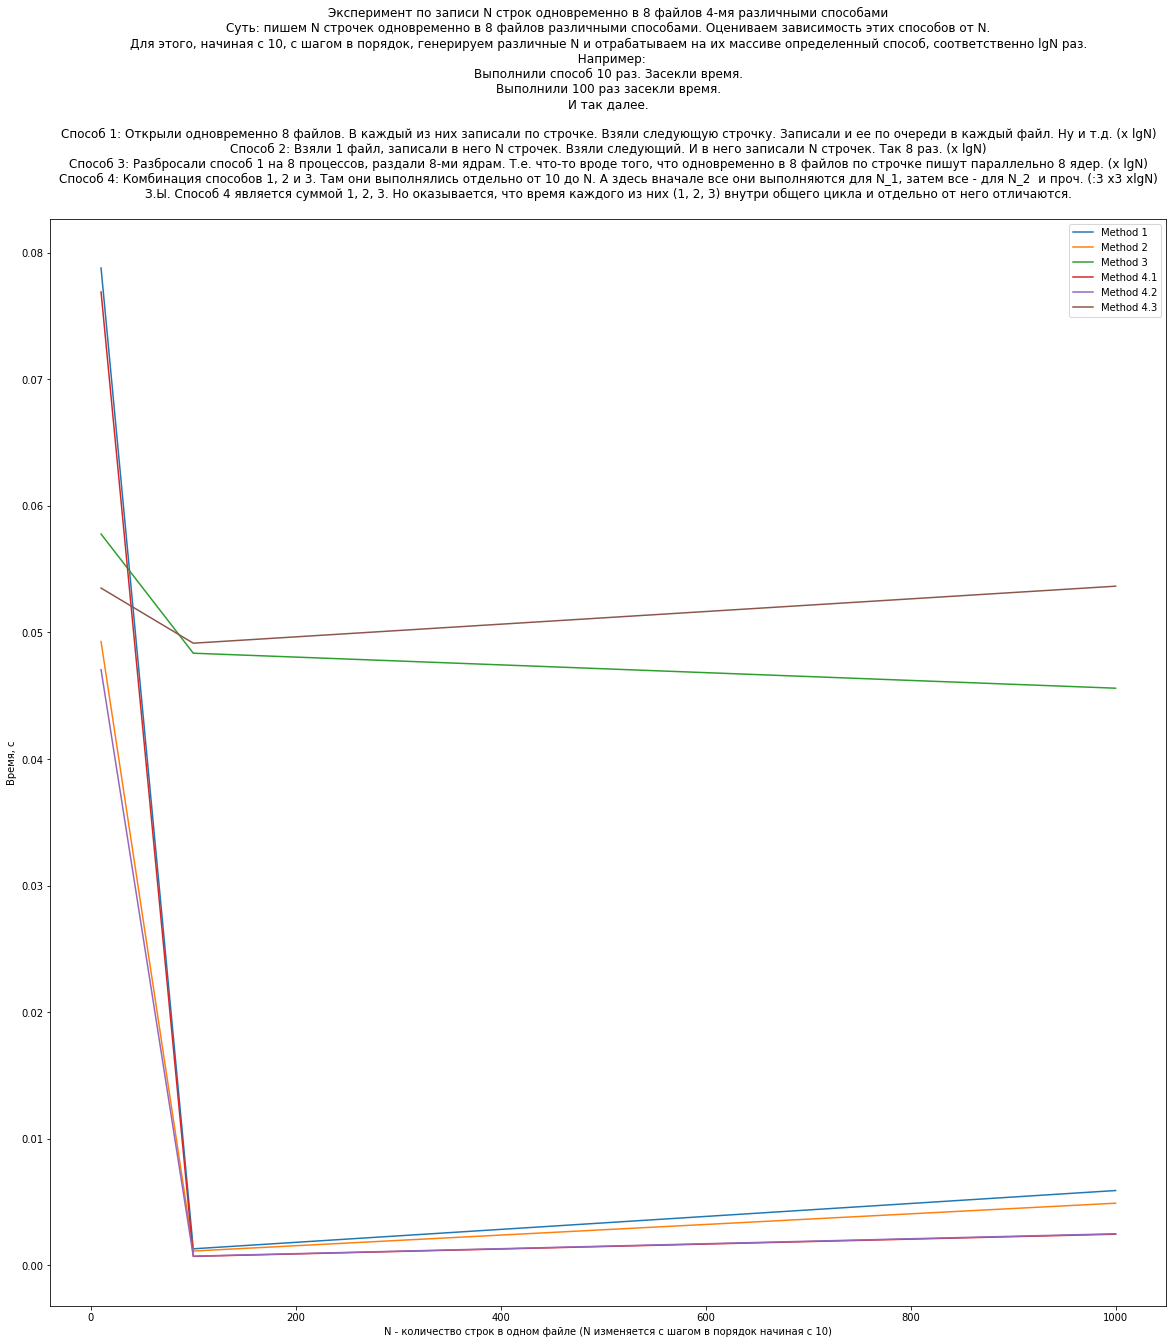

In [87]:
from multiprocessing import Process
import os

def e_file_print(file1, file2, file3, file4, file5, file6, file7, file8, n):
    start_time = time()
    f1 = open(file1, 'w')
    f2 = open(file2, 'w')
    f3 = open(file3, 'w')
    f4 = open(file4, 'w')
    f5 = open(file5, 'w')
    f6 = open(file6, 'w')
    f7 = open(file7, 'w')
    f8 = open(file8, 'w')
    for i in range (n):
        f1.write(str(i) + '\n')
        f2.write(str(i) + '\n') 
        f3.write(str(i) + '\n') 
        f4.write(str(i) + '\n') 
        f5.write(str(i) + '\n') 
        f6.write(str(i) + '\n') 
        f7.write(str(i) + '\n') 
        f8.write(str(i) + '\n') 
    f1.close()
    f2.close()
    f3.close()
    f4.close()
    f5.close()
    f6.close()
    f7.close()
    f8.close()

    return time() - start_time

def one_file_print(file, n):
    start_time = time()
    f1 = open(file, 'w')
    for i in range (n):
        f1.write(str(i) + '\n')
    f1.close()
    return time() - start_time

if __name__ == '__main__':
    
    #########################################################
    ## Способ 1. 8 файлов. Все 3 в одном цикле. k - константа
    #########################################################
    p = 'Суть: пишем N строчек одновременно в 8 файлов различными способами. Оцениваем зависимость этих способов от N.\nДля этого, начиная с 10, с шагом в порядок, генерируем различные N и отрабатываем на их массиве определенный способ, соответственно lgN раз.\n  Например:\nВыполнили способ 10 раз. Засекли время.\nВыполнили 100 раз засекли время.\nИ так далее.\n\nСпособ 1: Открыли одновременно 8 файлов. В каждый из них записали по строчке. Взяли следующую строчку. Записали и ее по очереди в каждый файл. Ну и т.д. (x lgN)\nСпособ 2: Взяли 1 файл, записали в него N строчек. Взяли следующий. И в него записали N строчек. Так 8 раз. (x lgN)\nСпособ 3: Разбросали способ 1 на 8 процессов, раздали 8-ми ядрам. Т.е. что-то вроде того, что одновременно в 8 файлов по строчке пишут параллельно 8 ядер. (x lgN)\nСпособ 4: Комбинация способов 1, 2 и 3. Там они выполнялись отдельно от 10 до N. А здесь вначале все они выполняются для N_1, затем все - для N_2  и проч. (:3 x3 xlgN)\nЗ.Ы. Способ 4 является суммой 1, 2, 3. Но оказывается, что время каждого из них (1, 2, 3) внутри общего цикла и отдельно от него отличаются.\n'
    D = 10**3
    res_1 = {'n': [], 'simultaneously to 8 files (one string to 8 files per 1 time - N times)': [], 'one by one to the 8 files in the queue': [], 'simultaneously 8 files by multiprocessing': []}
    res_df_1 = pd.DataFrame(res_1)
    
    i, k = 0, 10
    while (k <= D):
    
        start_time = time()
        e_file_print('file_1_1_1.txt','file_1_1_2.txt','file_1_1_3.txt', 'file_1_1_4.txt', 'file_1_1_5.txt', 'file_1_1_6.txt', 'file_1_1_7.txt', 'file_1_1_8.txt', k)
        t1 = time() - start_time
    
        start_time = time()
        one_file_print('file_1_2_1.txt', k)
        one_file_print('file_1_2_2.txt', k)
        one_file_print('file_1_2_3.txt', k)
        one_file_print('file_1_2_4.txt', k)
        one_file_print('file_1_2_5.txt', k)
        one_file_print('file_1_2_6.txt', k)
        one_file_print('file_1_2_7.txt', k)
        one_file_print('file_1_2_8.txt', k)
        t2 = time() - start_time
    
        start_time = time()
        proc1 = Process(target = one_file_print, args = ('file_1_3_1.txt', k))
        proc2 = Process(target = one_file_print, args = ('file_1_3_2.txt', k))
        proc3 = Process(target = one_file_print, args = ('file_1_3_3.txt', k))
        proc4 = Process(target = one_file_print, args = ('file_1_3_4.txt', k))
        proc5 = Process(target = one_file_print, args = ('file_1_3_5.txt', k))
        proc6 = Process(target = one_file_print, args = ('file_1_3_6.txt', k))
        proc7 = Process(target = one_file_print, args = ('file_1_3_7.txt', k))
        proc8 = Process(target = one_file_print, args = ('file_1_3_8.txt', k))

        proc1.start()
        proc2.start()
        proc3.start()
        proc4.start()
        proc5.start()
        proc6.start()
        proc7.start()
        proc8.start()

        proc1.join()
        proc2.join()
        proc3.join()
        proc4.join()
        proc5.join()
        proc6.join()
        proc7.join()
        proc8.join()
        t3 = time() - start_time
    
        res_df_1.loc[i] = [k, t1, t2, t3]
    
        k *= 10
        i += 1
        
    ################################################################
    ## Способ 2. 2 файла. Все 3 каждый в своем цикле. k - константа
    ################################################################

    res_2 = {'n': [], 'simultaneously to 8 files (one string to 8 files per 1 time - N times)': [], 'one by one to the 8 files in the queue': [], 'simultaneously 8 files by multiprocessing': []}
    res_df_2 = pd.DataFrame(res_2)

    k = 10
    km = []
    l1 = []
    while (k <= D):

        start_time = time()
        e_file_print('file_2_1_1.txt','file_2_1_2.txt','file_2_1_3.txt', 'file_2_1_4.txt', 'file_2_1_5.txt', 'file_2_1_6.txt', 'file_2_1_7.txt', 'file_2_1_8.txt', k)
        t1 = time() - start_time
        km.append(k)
        l1.append(t1)
        k *= 10

    k = 10
    l2 = []
    while (k <= D):

        start_time = time()
        one_file_print('file_2_2_1.txt', k)
        one_file_print('file_2_2_2.txt', k)
        one_file_print('file_2_2_3.txt', k)
        one_file_print('file_2_2_4.txt', k)
        one_file_print('file_2_2_5.txt', k)
        one_file_print('file_2_2_6.txt', k)
        one_file_print('file_2_2_7.txt', k)
        one_file_print('file_2_2_8.txt', k)
        t2 = time() - start_time
        l2.append(t2)
        k *= 10
    
    k = 10
    l3 = []
    while (k <= D):
    
        start_time = time()
        proc1 = Process(target = one_file_print, args = ('file_2_3_1.txt', k))
        proc2 = Process(target = one_file_print, args = ('file_2_3_2.txt', k))
        proc3 = Process(target = one_file_print, args = ('file_2_3_3.txt', k))
        proc4 = Process(target = one_file_print, args = ('file_2_3_4.txt', k))
        proc5 = Process(target = one_file_print, args = ('file_2_3_5.txt', k))
        proc6 = Process(target = one_file_print, args = ('file_2_3_6.txt', k))
        proc7 = Process(target = one_file_print, args = ('file_2_3_7.txt', k))
        proc8 = Process(target = one_file_print, args = ('file_2_3_8.txt', k))

        proc1.start()
        proc2.start()
        proc3.start()
        proc4.start()
        proc5.start()
        proc6.start()
        proc7.start()
        proc8.start()
        proc1.join()
        proc2.join()
        proc3.join()
        proc4.join()
        proc5.join()
        proc6.join()
        proc7.join()
        proc8.join()
        t3 = time() - start_time
        l3.append(t3)
        k *= 10
    
    res_df_2['n'] = km
    res_df_2['simultaneously to 8 files (one string to 8 files per 1 time - N times)'] = l1
    res_df_2['one by one to the 8 files in the queue'] = l2
    res_df_2['simultaneously 8 files by multiprocessing'] = l3
        

        
    fig = plt.figure()
    plt.figure(figsize=(20,20))
    ax = plt.gca()
    res_df_1.plot(x='n',y='simultaneously to 8 files (one string to 8 files per 1 time - N times)', ax=ax)
    res_df_1.plot(x='n',y='one by one to the 8 files in the queue', ax=ax)
    res_df_1.plot(x='n',y='simultaneously 8 files by multiprocessing', ax=ax)
    res_df_2.plot(x='n',y='simultaneously to 8 files (one string to 8 files per 1 time - N times)', ax=ax)
    res_df_2.plot(x='n',y='one by one to the 8 files in the queue', ax=ax)
    res_df_2.plot(x='n',y='simultaneously 8 files by multiprocessing', ax=ax)
    
    ax.grid('on', which='minor', axis='x' )
#    ax.grid('on', which='minor', axis='y' )
    ax.set_xlabel("N - количество строк в одном файле (N изменяется с шагом в порядок начиная с 10)")
    ax.set_ylabel("Время, с")
    plt.title('Эксперимент по записи N строк одновременно в 8 файлов 4-мя различными способами\n' + p)
   # ax.annotate('average',(5000,0.001))
    ax.legend(["Method 1", "Method 2", "Method 3", "Method 4.1", "Method 4.2", "Method 4.3"])
#    print(res_df_1)
#    print(res_df_2)
    
    fig.savefig('N = 10**3.pdf')